# Cross validation of the SNP-Gene-Bacteria data in 2 cities

## Step 1: Data preprocessing

### 1.1 Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### 1.2 Load the data

Load the filtered full dataset and check the first few rows of the data.

> The folder containing all the data to be used is too large, thus the data is not included in the repository, see [README](https://github.com/Lucas04-nhr/SNP-Analysis/blob/main/README.md#structure-of-the-result-directory) to check the data source.

> The "Bacteria" column has not been replaced by the real names yet.

In [2]:
full_data_bj = pd.read_csv('../../result/analysis/cross_validation/bac_age_BJ.csv')
full_data_gz = pd.read_csv('../../result/analysis/cross_validation/bac_age_GZ.csv')


In [3]:
full_data_bj.head()


,CHR,SNP,UNADJ,GC,BONF,HOLM,SIDAK_SS,SIDAK_SD,FDR_BH,FDR_BY,Bacteria
0,4,4:8609098,1.052000e-70,0.000003,1.119000e-63,1.119000e-63,inf,inf,1.119000e-63,1.874000e-62,38
1,20,20:30977589,1.002000e-69,0.000003,1.065000e-62,1.065000e-62,inf,inf,5.324000e-63,8.920000e-62,38
2,18,18:64718990,1.591000e-65,0.000012,1.691000e-58,1.691000e-58,inf,inf,5.638000e-59,9.447000e-58,38
3,HG1523_PATCH,HG1523_PATCH:43470,1.057000e-65,0.000001,1.123000e-58,1.123000e-58,inf,inf,7.891000e-59,1.322000e-57,17
4,26,26:12121,2.227000e-65,0.000028,2.367000e-58,2.367000e-58,inf,inf,7.891000e-59,1.322000e-57,17


In [4]:
full_data_gz.head()


,CHR,SNP,UNADJ,GC,BONF,HOLM,SIDAK_SS,SIDAK_SD,FDR_BH,FDR_BY,Bacteria
0,18,18:107881,1.282000e-52,0.000008,7.951000e-46,7.951000e-46,inf,inf,7.951000e-46,1.289000e-44,4
1,GL000225.1,GL000225.1:63186,2.544000e-48,0.000003,1.579000e-41,1.579000e-41,inf,inf,1.579000e-41,2.560000e-40,45
2,GL000225.1,GL000225.1:63182,5.185000e-48,0.000009,3.217000e-41,3.217000e-41,inf,inf,1.608000e-41,2.609000e-40,45
3,HG2069_PATCH,HG2069_PATCH:279669,1.065000e-45,0.000037,6.609000e-39,6.609000e-39,inf,inf,2.203000e-39,3.573000e-38,45
4,20,20:31067694,2.478000e-45,0.000038,1.538000e-38,1.538000e-38,inf,inf,3.844000e-39,6.234000e-38,45


In [5]:
full_bac_bj = pd.read_csv('../../data/export/FMGC.ge/Beijing.csv')
full_bac_gz = pd.read_csv('../../data/export/FMGC.ge/Guangzhou.csv')


In [6]:
full_bac_bj.head()


,Genus,BJ001,BJ002,BJ004,BJ005,BJ006,BJ008,BJ013,BJ014,BJ015,...,BJ214,BJ215,BJ216,BJ217,BJ218,BJ219,BJ220,BJ222,BJ223,BJ224
0,2-12-FULL-35-15,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001802,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
1,Abiotrophia,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
2,Acetatifactor,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
3,Acetobacter,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
4,Acidovorax,0.000771,0.0,0.000267,0.000776,0.000583,0.001942,0.000264,0.000468,0.000566,...,0.000129,0.000209,0.000932,0.000815,0.00076,0.000497,0.001119,0.001657,0.000462,0.00092


In [7]:
full_bac_gz.head()


,Genus,GZ001,GZ002,GZ003,GZ004,GZ005,GZ006,GZ007,GZ008,GZ009,...,GZ228,GZ229,GZ231,GZ232,GZ233,GZ234,GZ235,GZ236,GZ237,GZ238
0,21-14-0-10-47-8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Abiotrophia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Achromobacter,0.000000,0.000000,0.000263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.010991,0.002700,0.000000,0.029905,0.000000,0.004649
3,Acidovorax,0.000644,0.000195,0.000583,0.000432,0.000393,0.000391,0.000187,0.000448,0.000759,...,0.000712,0.000519,0.000141,0.000313,0.001125,0.000699,0.000609,0.001400,0.000196,0.000532
4,Acidovorax_A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000284,0.000000,0.000000


### 1.3 Load the metadata of each bacteria

Load the metadata of each bacteria and check the first few rows of the data.

In [8]:
bac_bj = pd.read_csv('../../result/analysis/top_bacteria/bacteria_BJ.csv')
bac_gz = pd.read_csv('../../result/analysis/top_bacteria/bacteria_GZ.csv')


In [9]:
bac_bj.head()


,No.,Species
0,1,Actinomyces oris
1,2,Aeromonas caviae
2,3,Alloprevotella sp015259235
3,4,Anaerococcus nagyae
4,5,Corynebacterium kefirresidentii


In [10]:
bac_gz.head()


,No.,Species
0,1,Acinetobacter baumannii
1,2,Aeromonas caviae
2,3,Anaerococcus nagyae
3,4,Corynebacterium kefirresidentii
4,5,Corynebacterium macginleyi


### 1.4 Replace the "Bacteria" column with the real names

Replace the "Bacteria" column with the real names of the bacteria.

In [11]:
# Merge full_data_bj with bac_bj to replace Bacteria column with real names
full_data_bj = full_data_bj.merge(bac_bj, left_on='Bacteria', right_on='No.', how='left')

# Drop the original Bacteria column and the No. column from bac_bj
full_data_bj = full_data_bj.drop(columns=['Bacteria', 'No.'])

# Rename the Species column to Bacteria
full_data_bj = full_data_bj.rename(columns={'Species': 'Bacteria'})

# Display the updated dataframe
full_data_bj.head()


,CHR,SNP,UNADJ,GC,BONF,HOLM,SIDAK_SS,SIDAK_SD,FDR_BH,FDR_BY,Bacteria
0,4,4:8609098,1.052000e-70,0.000003,1.119000e-63,1.119000e-63,inf,inf,1.119000e-63,1.874000e-62,Veillonella parvula_A
1,20,20:30977589,1.002000e-69,0.000003,1.065000e-62,1.065000e-62,inf,inf,5.324000e-63,8.920000e-62,Veillonella parvula_A
2,18,18:64718990,1.591000e-65,0.000012,1.691000e-58,1.691000e-58,inf,inf,5.638000e-59,9.447000e-58,Veillonella parvula_A
3,HG1523_PATCH,HG1523_PATCH:43470,1.057000e-65,0.000001,1.123000e-58,1.123000e-58,inf,inf,7.891000e-59,1.322000e-57,Porphyromonas pasteri
4,26,26:12121,2.227000e-65,0.000028,2.367000e-58,2.367000e-58,inf,inf,7.891000e-59,1.322000e-57,Porphyromonas pasteri


In [12]:
# Merge full_data_gz with bac_gz to replace Bacteria column with real names
full_data_gz = full_data_gz.merge(bac_gz, left_on='Bacteria', right_on='No.', how='left')

# Drop the original Bacteria column and the No. column from bac_gz
full_data_gz = full_data_gz.drop(columns=['Bacteria', 'No.'])

# Rename the Species column to Bacteria
full_data_gz = full_data_gz.rename(columns={'Species': 'Bacteria'})

# Display the updated dataframe
full_data_gz.head()


,CHR,SNP,UNADJ,GC,BONF,HOLM,SIDAK_SS,SIDAK_SD,FDR_BH,FDR_BY,Bacteria
0,18,18:107881,1.282000e-52,0.000008,7.951000e-46,7.951000e-46,inf,inf,7.951000e-46,1.289000e-44,Corynebacterium kefirresidentii
1,GL000225.1,GL000225.1:63186,2.544000e-48,0.000003,1.579000e-41,1.579000e-41,inf,inf,1.579000e-41,2.560000e-40,Vibrio metschnikovii
2,GL000225.1,GL000225.1:63182,5.185000e-48,0.000009,3.217000e-41,3.217000e-41,inf,inf,1.608000e-41,2.609000e-40,Vibrio metschnikovii
3,HG2069_PATCH,HG2069_PATCH:279669,1.065000e-45,0.000037,6.609000e-39,6.609000e-39,inf,inf,2.203000e-39,3.573000e-38,Vibrio metschnikovii
4,20,20:31067694,2.478000e-45,0.000038,1.538000e-38,1.538000e-38,inf,inf,3.844000e-39,6.234000e-38,Vibrio metschnikovii


## Step 2: Data analysis

### 2.1 Check the distribution of the target variable

Draw a histogram of the distribution of bacteria of top-100 smallest FDR-BY p-values in the two cities.

#### 2.1.1 p-value threshold

In [13]:
# See the 100th p-value
print('100th p-value of Beijing:', full_data_bj.loc[99, 'FDR_BY'])


100th p-value of Beijing: 8.401e-47


In [14]:
print('100th p-value of Guangzhou:', full_data_gz.loc[99, 'FDR_BY'])


100th p-value of Guangzhou: 4.185e-32


#### 2.1.2 Top-100 smallest FDR-BY p-values

In [15]:
# Use list to store the top
bac_bj_top = full_data_bj['Bacteria'].head(100).unique()
bac_gz_top = full_data_gz['Bacteria'].head(100).unique()

# Fill the counts of each bacteria in the top 100 FDR_BY
count_bj = []
count_gz = []

# Count the number of bacteria in the top 100 FDR_BY that are in the top 100 bacteria

# Count the occurrences of each bacteria in the top 100 rows
count_bj = full_data_bj['Bacteria'].head(100).value_counts().reindex(bac_bj_top, fill_value=0).tolist()

# Count the number of bacteria in the top 100 FDR_BY that are in the top 100 bacteria

count_gz = full_data_gz['Bacteria'].head(100).value_counts().reindex(bac_gz_top, fill_value=0).tolist()

# Create a dataframe to store the counts
count_bj = pd.DataFrame({'Bacteria': bac_bj_top, 'Count': count_bj})
count_gz = pd.DataFrame({'Bacteria': bac_gz_top, 'Count': count_gz})

# Sort the dataframe by the counts
count_bj = count_bj.sort_values(by='Count', ascending=False)
count_gz = count_gz.sort_values(by='Count', ascending=False)


In [16]:
# Print the top 10 bacteria in BJ
count_bj.head(10)


,Bacteria,Count
1,Porphyromonas pasteri,64
0,Veillonella parvula_A,36


In [17]:
count_gz.head(10)


,Bacteria,Count
1,Vibrio metschnikovii,48
3,Unclassified_A36_bin.27,20
0,Corynebacterium kefirresidentii,16
6,Acinetobacter baumannii,7
2,Staphylococcus epidermidis,5
5,Cutibacterium modestum,3
4,Lawsonella clevelandensis_A,1


#### 2.1.3 See the unique bacteria count of each city

In [18]:
# See the unique bacteria count in Beijing
full_data_bj['Bacteria'].nunique()


36

In [19]:
# See the unique bacteria count in Guangzhou
full_data_gz['Bacteria'].nunique()


46

#### 2.1.4 Draw a venn diagram of the unique bacteria count of each city

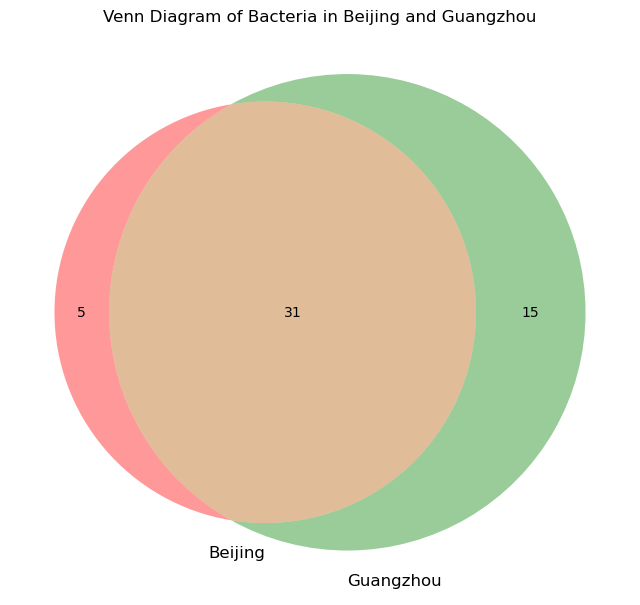

In [20]:
# Draw the Venn diagram

from matplotlib_venn import venn2

# Create a set for all the bacteria in BJ and GZ
set_bj = set(full_data_bj['Bacteria'].unique())
set_gz = set(full_data_gz['Bacteria'].unique())

# Create a Venn diagram
plt.figure(figsize=(8, 8), dpi=100)
venn2([set_bj, set_gz], ('Beijing', 'Guangzhou'))
plt.title('Venn Diagram of Bacteria in Beijing and Guangzhou')
plt.savefig('./venn_diagram_bac_age.pdf')
plt.show()


### 2.2 Set the threshold of the p-value

Use 5th, 10th,..., 95th percentile of the p-values as the threshold to filter the data.

In [21]:
# Set the threshold of FDR_BY in Beijing
threshold_bj = []
for i in range(1, 21):
  num = 5 * i
  print(f'Threshold of FDR_BY in Beijing: {num}')
  print(full_data_bj.loc[num-1, 'FDR_BY'])
  threshold_bj.append(full_data_bj.loc[num-1, 'FDR_BY'])


Threshold of FDR_BY in Beijing: 5
1.322e-57
Threshold of FDR_BY in Beijing: 10
2.046e-57
Threshold of FDR_BY in Beijing: 15
9.999000000000001e-57
Threshold of FDR_BY in Beijing: 20
1.653e-56
Threshold of FDR_BY in Beijing: 25
2.4300000000000007e-56
Threshold of FDR_BY in Beijing: 30
1.716e-55
Threshold of FDR_BY in Beijing: 35
7.196e-55
Threshold of FDR_BY in Beijing: 40
2.6219999999999997e-54
Threshold of FDR_BY in Beijing: 45
9.413e-54
Threshold of FDR_BY in Beijing: 50
3.5279999999999993e-53
Threshold of FDR_BY in Beijing: 55
9.487e-53
Threshold of FDR_BY in Beijing: 60
3.907e-52
Threshold of FDR_BY in Beijing: 65
2.961e-51
Threshold of FDR_BY in Beijing: 70
3.735e-50
Threshold of FDR_BY in Beijing: 75
5.294000000000001e-50
Threshold of FDR_BY in Beijing: 80
3.016e-49
Threshold of FDR_BY in Beijing: 85
1.171e-48
Threshold of FDR_BY in Beijing: 90
4.027e-48
Threshold of FDR_BY in Beijing: 95
1.281e-47
Threshold of FDR_BY in Beijing: 100
8.401e-47


In [22]:
print(threshold_bj)


[1.322e-57, 2.046e-57, 9.999000000000001e-57, 1.653e-56, 2.4300000000000007e-56, 1.716e-55, 7.196e-55, 2.6219999999999997e-54, 9.413e-54, 3.5279999999999993e-53, 9.487e-53, 3.907e-52, 2.961e-51, 3.735e-50, 5.294000000000001e-50, 3.016e-49, 1.171e-48, 4.027e-48, 1.281e-47, 8.401e-47]


In [23]:
# Set the threshold of FDR_BY in Guangzhou
threshold_gz = []
for i in range(1, 21):
  num = 5 * i
  print(f'Threshold of FDR_BY in Guangzhou: {num}')
  print(full_data_gz.loc[num-1, 'FDR_BY'])
  threshold_gz.append(full_data_gz.loc[num-1, 'FDR_BY'])


Threshold of FDR_BY in Guangzhou: 5
6.234e-38
Threshold of FDR_BY in Guangzhou: 10
1.085e-36
Threshold of FDR_BY in Guangzhou: 15
8.481000000000001e-36
Threshold of FDR_BY in Guangzhou: 20
8.529000000000001e-35
Threshold of FDR_BY in Guangzhou: 25
9.158e-35
Threshold of FDR_BY in Guangzhou: 30
2.538e-34
Threshold of FDR_BY in Guangzhou: 35
5.447e-34
Threshold of FDR_BY in Guangzhou: 40
6.7e-34
Threshold of FDR_BY in Guangzhou: 45
8.874e-34
Threshold of FDR_BY in Guangzhou: 50
1.244e-33
Threshold of FDR_BY in Guangzhou: 55
2.022e-33
Threshold of FDR_BY in Guangzhou: 60
3.0189999999999997e-33
Threshold of FDR_BY in Guangzhou: 65
4.274e-33
Threshold of FDR_BY in Guangzhou: 70
4.716e-33
Threshold of FDR_BY in Guangzhou: 75
8.666e-33
Threshold of FDR_BY in Guangzhou: 80
1.462e-32
Threshold of FDR_BY in Guangzhou: 85
1.812e-32
Threshold of FDR_BY in Guangzhou: 90
2.078e-32
Threshold of FDR_BY in Guangzhou: 95
2.928e-32
Threshold of FDR_BY in Guangzhou: 100
4.185e-32


In [24]:
print(threshold_gz)


[6.234e-38, 1.085e-36, 8.481000000000001e-36, 8.529000000000001e-35, 9.158e-35, 2.538e-34, 5.447e-34, 6.7e-34, 8.874e-34, 1.244e-33, 2.022e-33, 3.0189999999999997e-33, 4.274e-33, 4.716e-33, 8.666e-33, 1.462e-32, 1.812e-32, 2.078e-32, 2.928e-32, 4.185e-32]


We'll use a plot to visualize the cross-validation results of the SNP-Gene-Bacteria data in the two cities.

### 2.3 Cross-validation

#### 2.3.1 Scatter plot of the 20 percentile thresholds in 2 cities

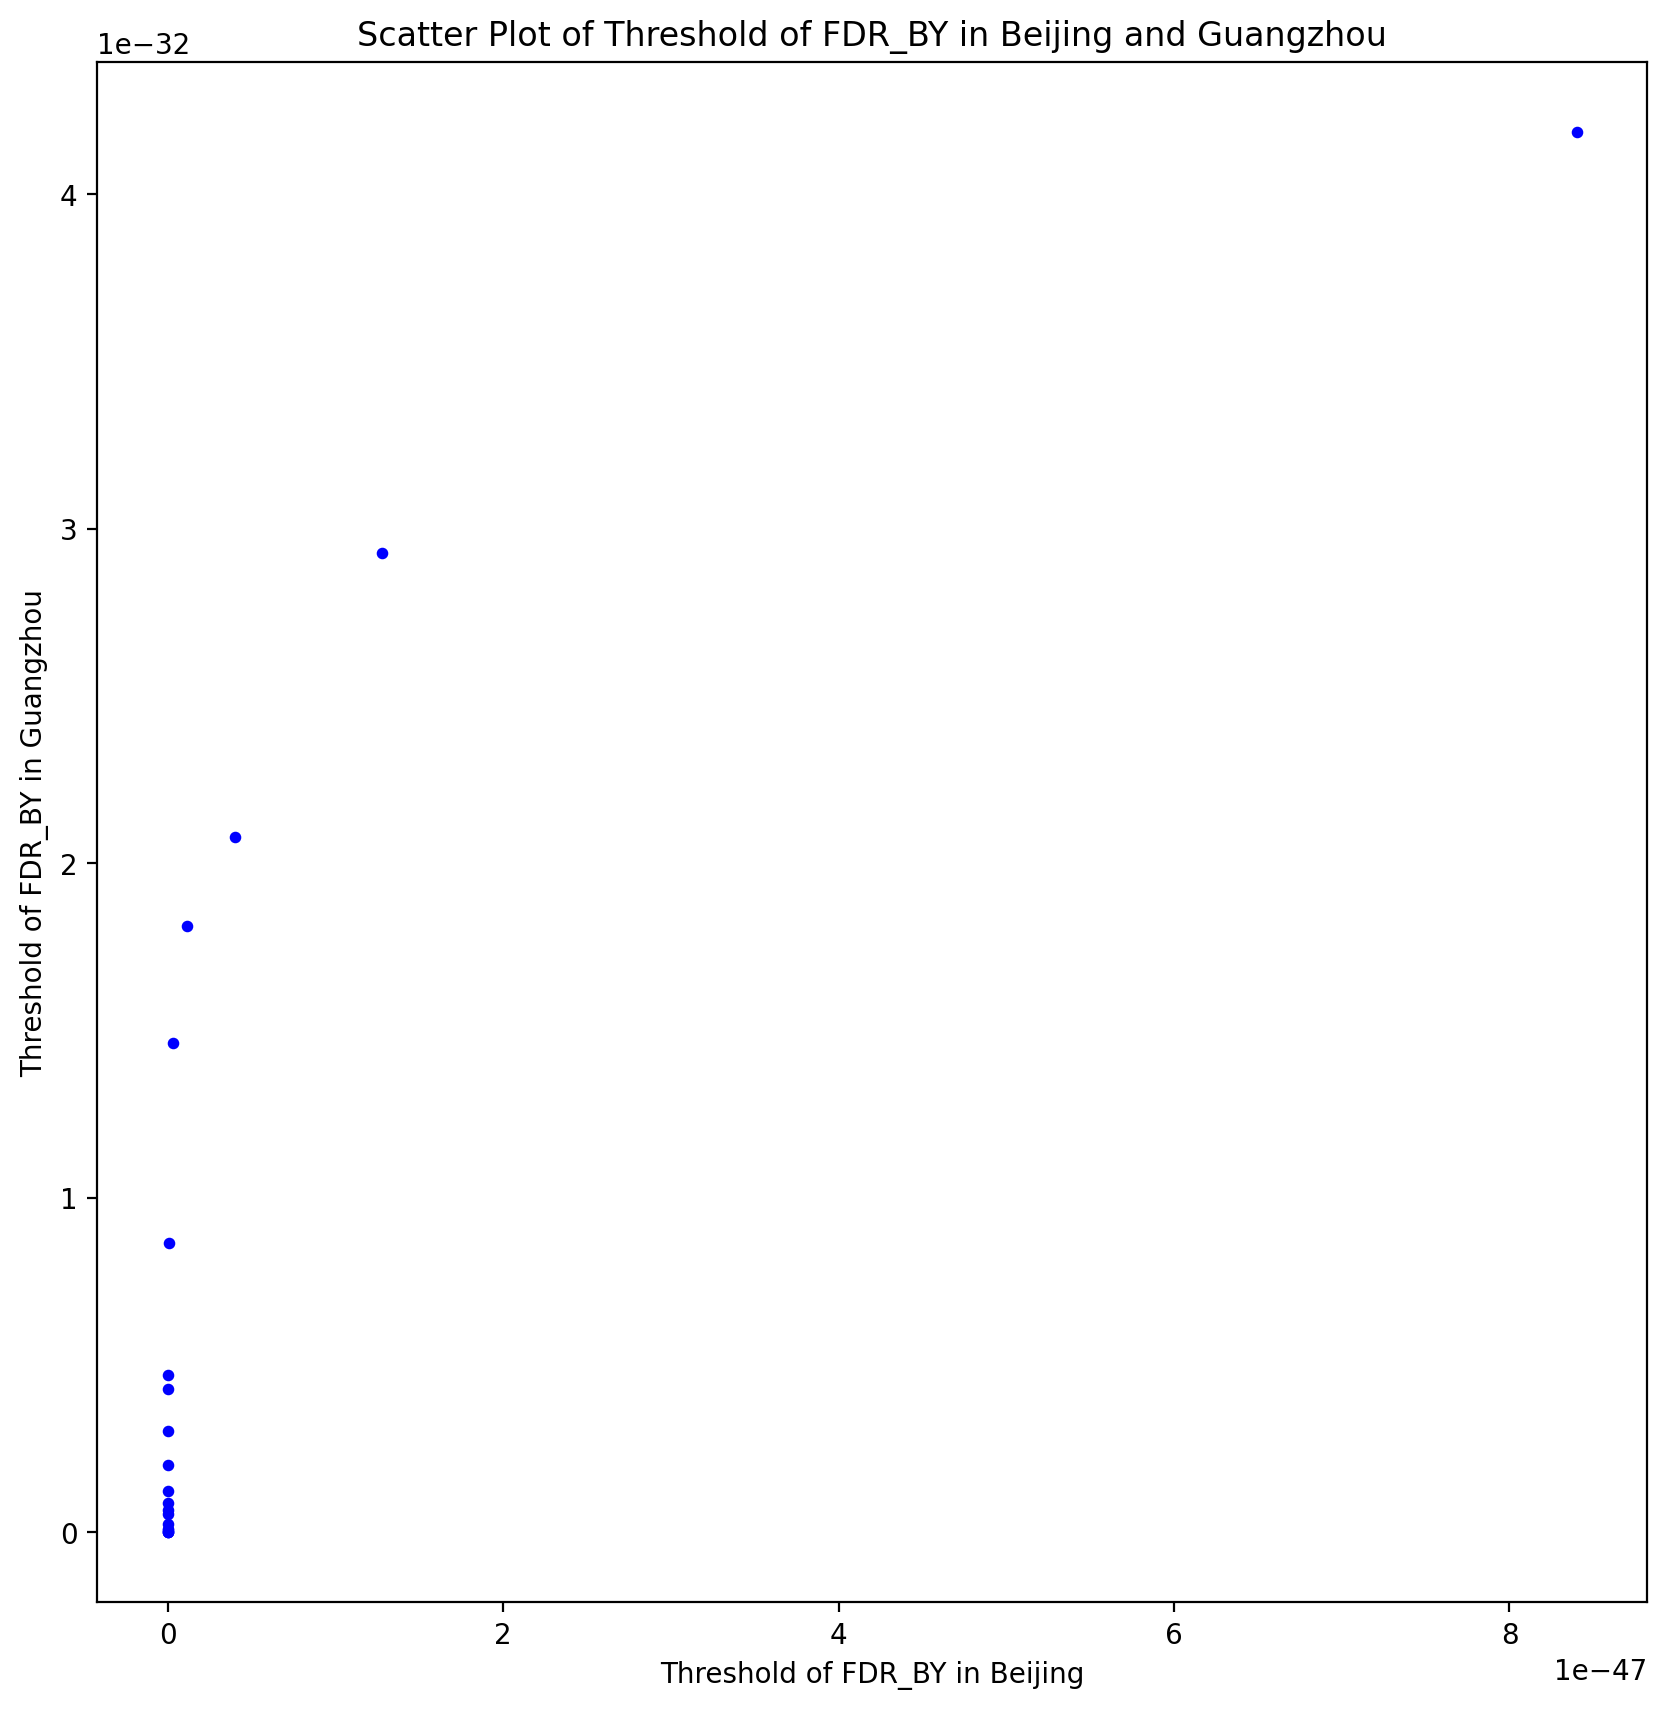

In [25]:
# Draw the scatter plot of the threshold of FDR_BY in two cities
plt.figure(figsize=(10, 10), dpi=200)
plt.scatter(threshold_bj, threshold_gz, color='blue', s=10)
# plt.plot([min(threshold_bj), max(threshold_bj)], [min(threshold_bj), max(threshold_bj)], color='red', linestyle='--')
plt.xlabel('Threshold of FDR_BY in Beijing')
plt.ylabel('Threshold of FDR_BY in Guangzhou')
plt.title('Scatter Plot of Threshold of FDR_BY in Beijing and Guangzhou')
plt.savefig('./scatter_threshold_bac_age.pdf')
plt.show()


From the scatter plot, we can see that the thresholds of the two cities have a significant difference.

So, the next step is to see the cross-validation results of the Bac-SNP data in the two cities.

#### 2.3.2 Filter the bacteria data out with the top